# Cardiovascular disease prediction

To detect the presence or absence of cardiovascular disease in person.
Features available are:
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Data Source:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [1]:
# Import the necessary libraries and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cardio_df = pd.read_csv("cardio_train.csv", sep=";")
display(cardio_df.head())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
##  Drop id
cardio_df = cardio_df.drop(columns = 'id')
##  convert day into years
cardio_df['age'] = cardio_df['age']/365
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
## checking the null values
cardio_df.isnull().sum()
# Checking the dataframe information
cardio_df.info()
# Statistical summary of the dataframe
cardio_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
## Obtain the features of the individuals who are older than 64.8 years old
cardio_df[cardio_df['age'] > 64.8].head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
395,64.824658,2,160,78.0,140,90,1,1,0,0,1,0
643,64.802740,1,154,79.0,130,80,1,1,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab810c2050>,
      dtype=object)

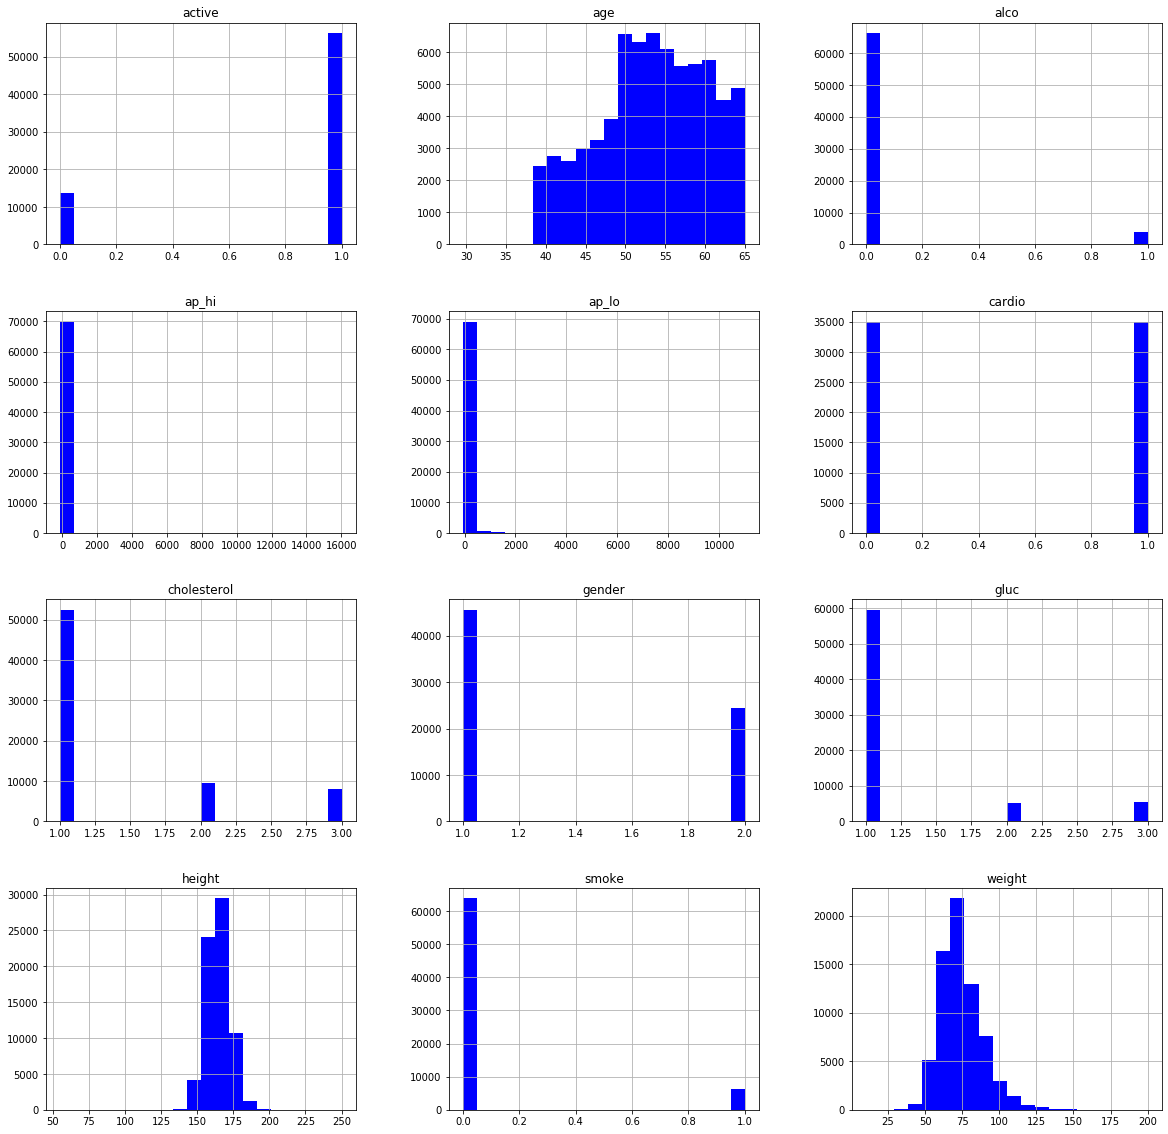

In [5]:
cardio_df.hist(bins=20, figsize=(20,20), color = 'b')

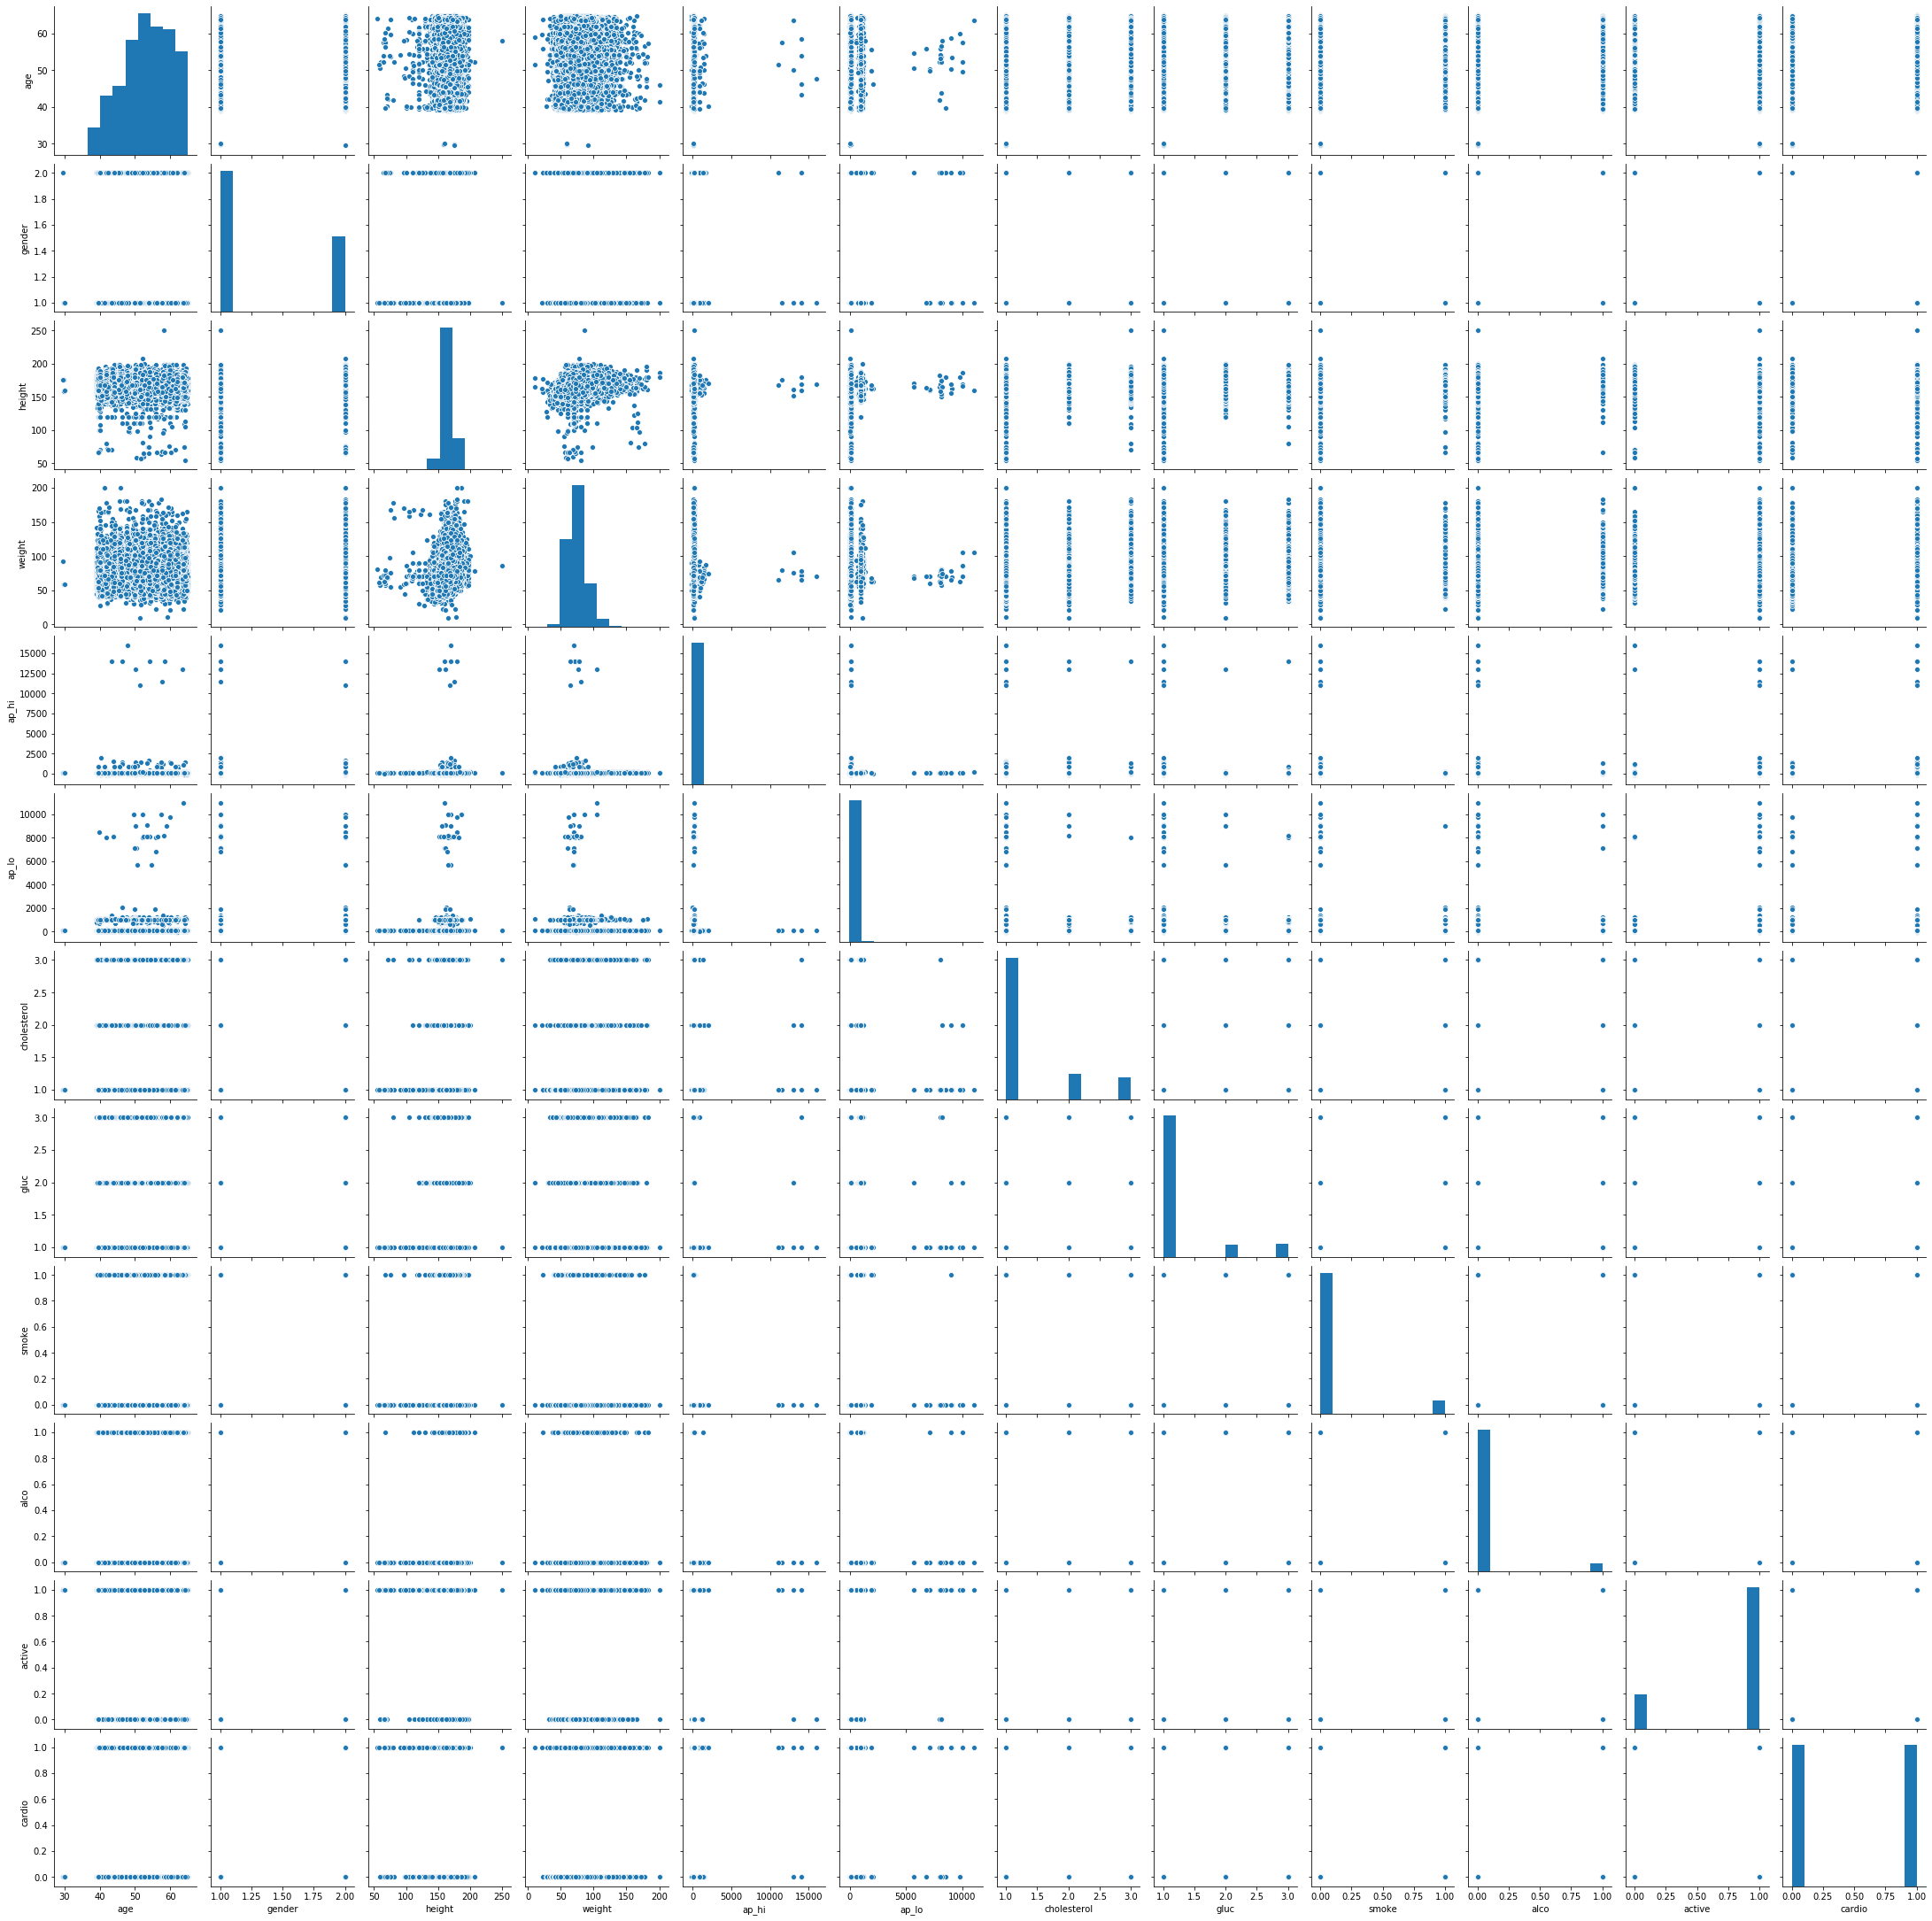

In [6]:
sns.pairplot(cardio_df)

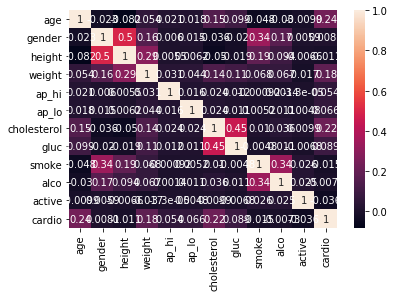

In [7]:
# Correlation
corr_matrix = cardio_df.corr()
sns.heatmap(corr_matrix, annot=True)

## CREATE TRAINING AND TESTING DATASET

In [8]:
# split the dataframe into target and features
df_target = cardio_df['cardio']
df_final = cardio_df.drop(columns =['cardio'])
print(cardio_df.columns)
df_final.shape, df_target.shape

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


((70000, 11), (70000,))

In [9]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final, df_target, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56000, 11), (56000,), (14000, 11), (14000,))

# TRAIN AND TEST XGBOOST MODEL 

In [10]:
# install xgboost
!pip install xgboost

## (1) Use xgboost model in local mode (no Sagemaker here) 

In [11]:
from xgboost import XGBClassifier
# model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
model = XGBClassifier(learning_rate = 0.01, n_estimators=500, max_depth=20)
# model = XGBClassifier()       # default
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:57:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [12]:
# make predictions on test data
predict = model.predict(X_test)
print(predict)

[1 0 0 ... 0 1 1]


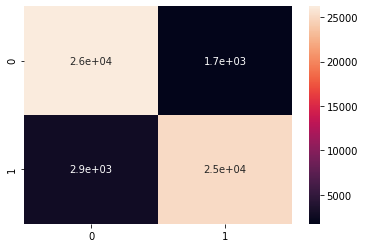

In [13]:
# Assess trained model performance on training dataset
predict_train = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predict_train)
plt.figure()
sns.heatmap(cm, annot=True)

### a). Training dataset

In [14]:
# For training dataset
from sklearn.metrics import precision_score, recall_score, accuracy_score
print("Precision = {}".format(precision_score(y_train, predict_train)))
print("Recall = {}".format(recall_score(y_train, predict_train)))
print("Accuracy = {}".format(accuracy_score(y_train, predict_train)))

Precision = 0.9351035739521738
Recall = 0.8969748858447488
Accuracy = 0.9172678571428572


### b). Training dataset

In [15]:
# For testing dataset
print("Precision = {}".format(precision_score(y_test, predict)))
print("Recall = {}".format(recall_score(y_test, predict)))
print("Accuracy = {}".format(accuracy_score(y_test, predict)))

Precision = 0.7203670276774969
Recall = 0.6893623146682021
Accuracy = 0.7130714285714286


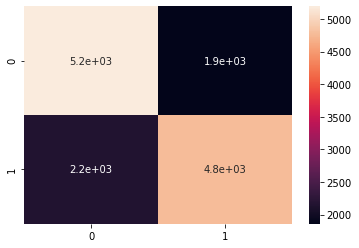

In [16]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm, annot=True)

##  (2). XGBoost classifier: hypermeter optimazation by using Sklearn (no Sagemaker)

In [17]:
param_grid = {
        'gamma': [0.5, 1, 5],   # regularization parameter 
        'subsample': [0.6, 0.8, 1.0], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
        'max_depth': [3, 4, 5] # depth of each tree
        }

In [20]:
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier(learning_rate = 0.01, n_estimators = 100, objective = 'binary:logistic')
grid = GridSearchCV(xgb_model, param_grid, verbose = 4)
grid.fit(X_train, y_train)

y_predict_optim = grid.predict(X_test)
y_predict_optim

array([1, 0, 0, ..., 0, 1, 1])

### Precision, Recal, Accuracy

In [21]:
# print metrics for testing dataset
print("Precision = {}".format(precision_score(y_test, y_predict_optim)))
print("Recall = {}".format(recall_score(y_test, y_predict_optim)))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict_optim)))

Precision = 0.7565061808718282
Recall = 0.6694976248740464
Accuracy = 0.7290714285714286


## (3)  Using Sagemaker for XGBoost model.
#### a). Perform dimensionality reduction using PCA 

In [11]:
import sagemaker
import boto3
sagemaker_session = sagemaker.Session()
bucket = 'sagemaker-practical-111'  # Use the default bucket name
prefix = 'pca'  # prefix is the subfolder within the bucket.
role = sagemaker.get_execution_role()

In [12]:
import io 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary
buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
df_matrix = df_final.to_numpy() # convert the dataframe into 2-dimensional array
smac.write_numpy_to_dense_tensor(buf, df_matrix)
buf.seek(0)

0

In [13]:
df_final.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,55.419178,1,156,85.0,140,90,3,1,0,0,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0
3,48.282192,2,169,82.0,150,100,1,1,0,0,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0


In [14]:
import os
key = 'pca'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-practical-111/pca/train/pca


In [15]:
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-practical-111/pca/output


In [16]:
from sagemaker import image_uris
container = sagemaker.image_uris.retrieve(boto3.Session().region_name, 'pca')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


In [1]:
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'pca')

pca = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.c4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)
# Tune parameters 
pca.set_hyperparameters(feature_dim=11,
                        num_components=6,
                        subtract_mean=False,
                        algorithm_mode='regular',
                        mini_batch_size=100)
# Train the pca model
pca.fit({'train': s3_train_data})

In [18]:
# Deploy the model to perform inference 
pca_reduction = pca.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

-------------!

In [19]:
from sagemaker.predictor import csv_serializer, json_deserializer
# pca_reduction.content_type = 'text/csv'
pca_reduction.serializer = csv_serializer
pca_reduction.deserializer = json_deserializer

In [20]:
# make prediction on the test data
result = pca_reduction.predict(np.array(df_final))

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [23]:
predictions = np.array([r['projection'] for r in result['projections']])
predictions

array([[-2.89103657e-01,  3.99437475e+00, -1.25495701e+01,
         6.42405853e+01,  3.68210945e+01, -2.17848068e+02],
       [ 1.09570193e+00, -4.77767706e+00,  1.23644390e+01,
         4.45821114e+01,  4.56663399e+01, -2.41025101e+02],
       [ 1.33668399e+00,  1.79976070e+00, -9.73582458e+00,
         5.34248428e+01,  5.57539673e+01, -2.23016754e+02],
       ...,
       [ 9.36102509e-01,  6.50153160e+00,  2.10844498e+01,
         4.50918350e+01,  7.45691071e+01, -2.82263916e+02],
       [ 1.15454197e-03, -8.17430115e+00, -2.97180176e+00,
         5.16770020e+01,  5.14335823e+01, -2.34024872e+02],
       [ 3.68915290e-01, -1.09633231e+00, -4.88934517e+00,
         6.41318741e+01,  4.39791260e+01, -2.28002136e+02]])

In [24]:
predictions.shape, 

((70000, 6),)

In [25]:
# Delete the end-point !!!
pca_reduction.delete_endpoint()

In [29]:
train_data = pd.DataFrame({'Target':df_target})
for i in range(predictions.shape[1]):
    train_data[i] = predictions[:,i]
train_data.head()

,Target,0,1,2,3,4,5
0,0,-0.289104,3.994375,-12.549570,64.240585,36.821095,-217.848068
1,1,1.095702,-4.777677,12.364439,44.582111,45.666340,-241.025101
2,1,1.336684,1.799761,-9.735825,53.424843,55.753967,-223.016754
3,1,-0.416388,6.149697,5.682127,43.042397,45.009624,-257.243164
4,0,-0.149804,2.675003,-13.209843,63.610920,44.346691,-192.799316


In [30]:
train_data_size = int(0.9 * train_data.shape[0])
train_data_size

63000

In [33]:
import sklearn 
train_data = sklearn.utils.shuffle(train_data)
train, test, valid = train_data[:train_data_size], train_data[train_data_size:train_data_size + 3500], train_data[train_data_size + 3500:]
train.shape, test.shape,valid.shape

((63000, 7), (3500, 7), (3500, 7))

In [34]:
X_test, y_test = test.drop(columns = ['Target']), test['Target']
print(X_test.shape, y_test.shape)

# save train_data and validation_data as csv files
train.to_csv('train.csv',header = False, index = False)
valid.to_csv('valid.csv',header = False, index = False)

((3500, 6), (3500,))

In [37]:
prefix = 'XGBoost-Classifier'
key = 'XGBoost-Classifier'

# read the data from csv file and then upload the data to s3 bucket
with open('train.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-practical-111/XGBoost-Classifier/train/XGBoost-Classifier


In [38]:
# reading the data from csv file and then upload the data to s3 bucket
with open('valid.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'valid', key)).upload_fileobj(f)

# Let's print out the validation data location in s3
s3_valid_data = 's3://{}/{}/valid/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_valid_data))

uploaded validation data location: s3://sagemaker-practical-111/XGBoost-Classifier/valid/XGBoost-Classifier


In [39]:
# creates output placeholder in S3 bucket 
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-practical-111/XGBoost-Classifier/output


In [40]:
container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [41]:
Xgboost_classifier = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)
# Tune hyperparameters 
Xgboost_classifier.set_hyperparameters(max_depth=3,
                           objective='multi:softmax',
                           num_class= 2,
                           eta = 0.5,
                           num_round = 150
                           )

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [2]:
# Create "train", "validation" channels 
train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_valid_data, content_type='csv',s3_data_type = 'S3Prefix')
Xgboost_classifier.fit({'train': train_input, 'validation': valid_input})

###  b). Deploy XGBoost model (Sagemaker)

In [62]:
# Deploy the model (Sagemaker has been update, a little conflict happens) 
Xgboost_classifier = Xgboost_classifier.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

from sagemaker.predictor import csv_serializer, json_deserializer
#Xgboost_classifier.content_type = 'text/csv'
Xgboost_classifier.serializer = csv_serializer
Xgboost_classifier.deserializer = json_deserializer
# pca_reduction.serializer = csv_serializer
# pca_reduction.deserializer = json_deserializer
XGB_prediction = Xgboost_classifier.predict(np.array(X_test))

In [65]:
def bytes_2_array(x):
    l = str(x).split(',')    
    l[0] = l[0][2:]
    l[-1] = l[-1][:-1]
    for i in range(len(l)):
        l[i] = float(l[i])
    l = np.array(l).astype('float32')
    return l.reshape(-1,1)
predicted_values = bytes_2_array(XGB_prediction)
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

# Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
print("Precision = {}".format(precision_score(y_test, predicted_values, average='macro')))
print("Recall = {}".format(recall_score(y_test, predicted_values, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predicted_values)))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
plt.figure()
sns.heatmap(cm, annot=True)

In [ ]:
# Delete the end-point
Xgboost_classifier.delete_endpoint()